In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

top_albums = pd.read_csv('top.csv')

In [84]:
#Creating a copy of the original DataFrame

df = top_albums

In [85]:
df.head()

,Unnamed: 0,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature
0,0,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531,OK Computer,0.135763,0.288083,0.565917,0.161053,0.159375,-9.102417,0.056308,115.450750,0.291733,268435.500000,4.000000
1,1,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983,Wish You Were Here,0.602800,0.373600,0.409800,0.363040,0.384940,-12.689400,0.039740,130.018800,0.259040,530512.000000,3.600000
2,2,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870,In the Court of the Crimson King,0.297686,0.340625,0.370475,0.327265,0.149138,-14.873125,0.043463,118.920625,0.279400,507644.125000,3.875000
3,3,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734,Kid A,0.123219,0.601294,0.676706,0.000669,0.311412,-7.811941,0.268318,116.045059,0.398206,325379.529412,4.058824
4,4,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379,To Pimp a Butterfly,0.322889,0.590750,0.707625,0.000011,0.318419,-5.802062,0.294175,103.444563,0.487187,296225.750000,3.812500


In [86]:
df.columns

Index(['Unnamed: 0', 'ars_name', 'rel_date', 'gens', 'descs', 'avg_rat',
       'num_rat', 'num_revs', 'album', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'duration_ms', 'time_signature'],
      dtype='object')

In [87]:
#Making list of columns that will be dropped

dropped_columns = ['Unnamed: 0', 'descs', 'num_revs', 'acousticness', 'danceability', 'energy', 'speechiness', 
                   'valence', 'duration_ms', 'time_signature', 'instrumentalness', 'liveness', 'loudness', 'tempo']

In [88]:
df.drop(columns = dropped_columns, inplace=True)

In [89]:
#Creating a columns including release years 

df['rel_year'] = df['rel_date'].str[-4:]
df['rel_year'] = df['rel_year'].astype(int)

In [90]:
#Creating a column including decades

conditions = [
    (df['rel_year'] <= 1939),
    (df['rel_year'] > 1939) & (df['rel_year'] <= 1949),
    (df['rel_year'] > 1949) & (df['rel_year'] <= 1959),
    (df['rel_year'] > 1959) & (df['rel_year'] <= 1969),
    (df['rel_year'] > 1969) & (df['rel_year'] <= 1979),
    (df['rel_year'] > 1979) & (df['rel_year'] <= 1989),
    (df['rel_year'] > 1989) & (df['rel_year'] <= 1999),
    (df['rel_year'] > 1999) & (df['rel_year'] <= 2009),
    (df['rel_year'] > 2009) & (df['rel_year'] <= 2019),
    (df['rel_year'] > 2019) & (df['rel_year'] <= 2029),    
    ]

values = ['1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']

df['decade'] = np.select(conditions, values)

In [91]:
df.head()

,ars_name,rel_date,gens,avg_rat,num_rat,album,rel_year,decade
0,Radiohead,16 June 1997,"Alternative Rock, Art Rock",4.23,"70,382",OK Computer,1997,1990s
1,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock",4.29,"48,662",Wish You Were Here,1975,1970s
2,King Crimson,10 October 1969,"Progressive Rock, Art Rock",4.30,"44,943",In the Court of the Crimson King,1969,1960s
3,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic",4.21,"58,590",Kid A,2000,2000s
4,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap",4.27,"44,206",To Pimp a Butterfly,2015,2010s


In [92]:
# re-arranging column order

order = [5,0,3,4,6,7,2] 

df = df[[df.columns[i] for i in order]]

## What artists are featured the most in this dataset and how many albums do they each have?

In [78]:
n = 6
top_artists = df['ars_name'].value_counts()[:n]

top_artists

Various Artists    18
Miles Davis        17
Tom Waits          13
John Coltrane      12
John Williams      12
Bob Dylan          11
Name: ars_name, dtype: int64

In [18]:
top_artists.drop(['Various Artists'], inplace = True)

In [19]:
top_artists = top_artists.astype(int)

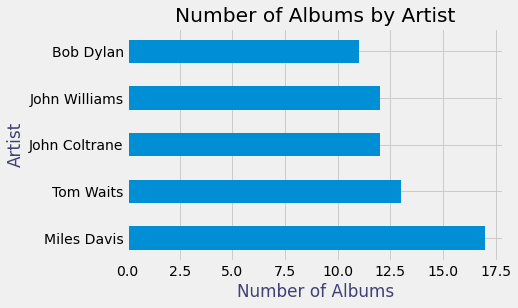

In [20]:
#Artists with the most albums in the list
top_artists.plot(
    kind='barh', 
    title = 'Number of Albums by Artist',   
)

plt.xlabel('Number of Albums', color= '#414173')
plt.ylabel('Artist', color = '#414173')
plt.style.use('fivethirtyeight')

# How many unique genres are there?

In [21]:
unique_genres = df['gens'].unique()
unique_genres

array(['Alternative Rock, Art Rock', 'Progressive Rock, Art Rock',
       'Art Rock, Experimental Rock, Electronic', ..., 'Disco, Funk',
       'Singer/Songwriter, Roots Rock, Americana',
       'Crust Punk, Metalcore'], dtype=object)

In [22]:
gen_df = df['gens'].str.split(',', expand=True)

gen_df.head()

,0,1,2,3,4
0,Alternative Rock,Art Rock,None,None,None
1,Progressive Rock,Art Rock,None,None,None
2,Progressive Rock,Art Rock,None,None,None
3,Art Rock,Experimental Rock,Electronic,None,None
4,Conscious Hip Hop,West Coast Hip Hop,Jazz Rap,None,None


In [23]:
#Turning genres columns into a list with all values

all_gens_list = gen_df[0].tolist() + gen_df[1].tolist() + gen_df[2].tolist() + gen_df[3].tolist()

In [24]:
#Turning the list back into a series

all_gens = pd.Series(all_gens_list)

In [25]:
#Finding number of unique genres

unique_gens_num = all_gens.nunique()
unique_gens_num

846

In [26]:
#unique genres as an array

unique_gens = all_gens.unique()
unique_gens

array(['Alternative Rock', 'Progressive Rock', 'Art Rock',
       'Conscious Hip Hop', 'Shoegaze', 'Pop Rock', 'Glam Rock',
       'Abstract Hip Hop', 'New Wave', 'Avant-Garde Jazz',
       'Spiritual Jazz', 'West Coast Hip Hop', 'Heavy Metal',
       'Modal Jazz', 'Baroque Pop', 'East Coast Hip Hop', 'Indie Folk',
       'Psychedelic Pop', 'Pop Rap', 'Contemporary Folk', 'Post-Rock',
       'Gothic Rock', 'Post-Punk', 'Jangle Pop', 'Folk Rock', 'Hard Rock',
       'Jazz Fusion', 'Dream Pop', 'Art Punk', 'Trip Hop', 'Art Pop',
       'Psychedelic Rock', 'Instrumental Hip Hop', 'Singer/Songwriter',
       'Symphonic Prog', 'Jazz Rap', 'Blues Rock', 'Soul',
       'Experimental Hip Hop', 'Industrial Hip Hop', 'Chamber Pop',
       'Experimental Rock', 'Chipmunk Soul', 'Noise Rock',
       'Alternative R&B', 'Thrash Metal', 'Krautrock', 'Southern Hip Hop',
       'Proto-Punk', 'Ambient Techno', 'Indie Rock', 'Hard Bop',
       'Jazz-Rock', 'Grunge', 'Technical Death Metal', 'Television Mu

In [27]:
#unique genres as a list

gens_list = unique_gens.tolist()
gens_list

['Alternative Rock',
 'Progressive Rock',
 'Art Rock',
 'Conscious Hip Hop',
 'Shoegaze',
 'Pop Rock',
 'Glam Rock',
 'Abstract Hip Hop',
 'New Wave',
 'Avant-Garde Jazz',
 'Spiritual Jazz',
 'West Coast Hip Hop',
 'Heavy Metal',
 'Modal Jazz',
 'Baroque Pop',
 'East Coast Hip Hop',
 'Indie Folk',
 'Psychedelic Pop',
 'Pop Rap',
 'Contemporary Folk',
 'Post-Rock',
 'Gothic Rock',
 'Post-Punk',
 'Jangle Pop',
 'Folk Rock',
 'Hard Rock',
 'Jazz Fusion',
 'Dream Pop',
 'Art Punk',
 'Trip Hop',
 'Art Pop',
 'Psychedelic Rock',
 'Instrumental Hip Hop',
 'Singer/Songwriter',
 'Symphonic Prog',
 'Jazz Rap',
 'Blues Rock',
 'Soul',
 'Experimental Hip Hop',
 'Industrial Hip Hop',
 'Chamber Pop',
 'Experimental Rock',
 'Chipmunk Soul',
 'Noise Rock',
 'Alternative R&B',
 'Thrash Metal',
 'Krautrock',
 'Southern Hip Hop',
 'Proto-Punk',
 'Ambient Techno',
 'Indie Rock',
 'Hard Bop',
 'Jazz-Rock',
 'Grunge',
 'Technical Death Metal',
 'Television Music',
 'Industrial Rock',
 'Post-Bop',
 'Hip Hop'

## Most prominent genre in 1960s along with most voted albums 

In [28]:
decade = df[df['decade'] == '1960s'][['album', 'ars_name', 'avg_rat', 'num_rat', 'rel_year','gens']]

In [29]:
top_five = decade[decade['gens'].isin(gens_list)].gens.value_counts().head()

In [30]:
top_five

Hard Bop            55
Post-Bop            39
Avant-Garde Jazz    14
Psychedelic Rock    11
Cool Jazz           10
Name: gens, dtype: int64

([<matplotlib.patches.Wedge at 0x18540532100>,
 [Text(0.2751590128138326, 1.1680271904657515, 'Hard Bop'),
  Text(-0.9720795345947094, -0.514841119591407, 'Post-Bop'),
  Text(0.22608177660300677, -1.07651615421601, 'Avant-Garde Jazz'),
  Text(0.801131540704181, -0.7537826307954737, 'Psychedelic Rock'),
  Text(1.0675409613966524, -0.26524761212932974, 'Cool Jazz')])

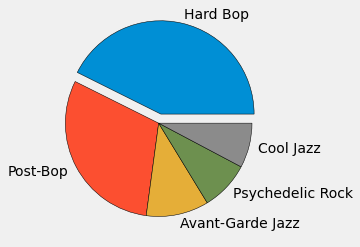

In [31]:
labels = ['Hard Bop','Post-Bop','Avant-Garde Jazz','Psychedelic Rock','Cool Jazz']
explode = [0.1, 0, 0, 0, 0]


plt.pie(top_five, labels = labels, explode=explode, wedgeprops = {'edgecolor': 'black'})

In [433]:
df['num_rat'] = df['num_rat'].str.replace(',', '')
df['num_rat'] = df['num_rat'].astype(int)

In [435]:
# 10 highest albums 1960s
top_ten =decade.sort_values('num_rat', ascending=False).head(10)

In [436]:
top_plot = top_ten[['album', 'num_rat']]

Text(0, 0.5, 'Artist')

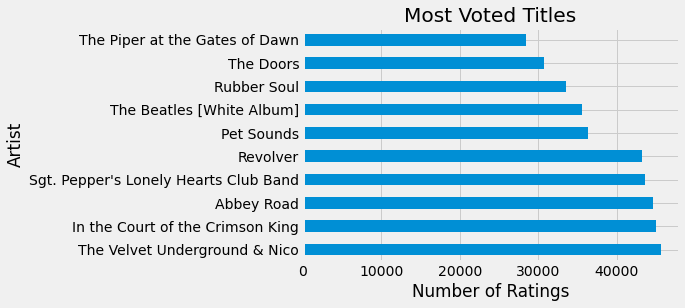

In [437]:
top_plot.set_index('album')['num_rat'].plot.barh(title='Most Voted Titles')

plt.xlabel('Number of Ratings')
plt.ylabel('Artist')